<a href="https://colab.research.google.com/github/pengj7/Machine_Learning_HW/blob/main/ML_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import numpy as np
from scipy.linalg import norm
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.patches as mpatches
from sklearn.model_selection import GridSearchCV

#Problem 1: Using IRIS Dataset and SVM code, Define two new feaatures using original four features and calculate accuracy score of classification.

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

clf = svm.SVC()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(preds)
print('actual iris species')
print(y_test)
acc = accuracy_score(y_test,clf.predict(X_test) )
print('Problem 1 sol: ', acc)

[1 1 1 1 0 2 2 0 0 2 0 2 2 2 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
Problem 1 sol:  0.9666666666666667


#Problem 2: Classify only the even numbered handwritten digits using MNIST digits dataset with a k-nearest neighbors classifier.

#-Classifier must not see any odd numbered digit images as inputs.

#-Classifier must also consider every pixel in the input image to make its classification decision.

#Can we use pairplot to visualize this data? Plot the classification results using a heatmap showing digits which were correctly classified and digits which were not correctly classified. How many 6's in your test set were correctly classified?

0.9870077141697118


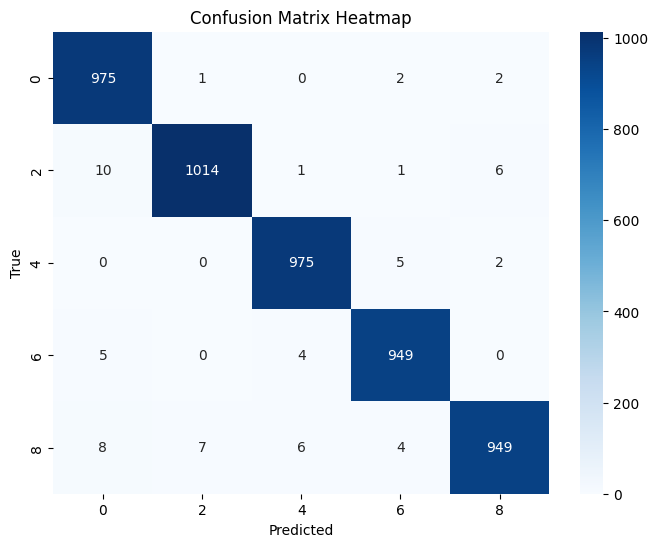

In [ ]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()
even_mask_train = (y_train_full % 2 == 0)
even_mask_test = (y_test_full % 2 == 0)

X_train_even = X_train_full[even_mask_train]
y_train_even = y_train_full[even_mask_train]

X_test_even = X_test_full[even_mask_test]
y_test_even = y_test_full[even_mask_test]

X_train_even_flat = X_train_even.reshape(X_train_even.shape[0], -1).astype("float32") / 255.0
X_test_even_flat = X_test_even.reshape(X_test_even.shape[0], -1).astype("float32") / 255.0

class My_KNNClassifier:
    def __init__(self, k=3):
        self.k = k
    def fit(self, X_train_even_flat, y_train_even):
        self.X_train_even_flat = X_train_even_flat
        self.y_train_even = y_train_even
    def predict(self, X_test_even_flat):
        predictions = []
        for i in range(X_test_even_flat.shape[0]):
            predictions.append(self._knn_classifier(X_test_even_flat[i]))
        return predictions
    def _knn_classifier(self, X_test_even_flat):
        distances, targets = [], []
        for i in range(self.X_train_even_flat.shape[0]):
            distance = np.linalg.norm(self.X_train_even_flat[i]-X_test_even_flat)
            distances.append([distance, i])
        distances = sorted(distances)
        for i in range(self.k):
            index = distances[i][1]
            targets.append(self.y_train_even[index])
        return max(targets, key=targets.count)

model = My_KNNClassifier()
model.fit(X_train_even_flat, y_train_even)
preds = model.predict(X_test_even_flat)
print(accuracy_score(y_test_even, preds))

cm = confusion_matrix(y_test_even, preds, labels=[0, 2, 4, 6, 8])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=[0, 2, 4, 6, 8], yticklabels=[0, 2, 4, 6, 8], cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#Problem 3: Cluster the Iris species using K-means algorithm using 3 features. Show visualization using 3D scatter plot. Compare cluster performance of k-means to sklearn implementation.

predicted_labels: [0 0 0 0 0 2 2 0 1 2 0 2 0 1 0 1 0 0 1 2 2 1 1 0 2 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0]
cluster centroids: [[6.22318841 2.84927536 4.88695652 1.65942029]
 [4.77777778 3.11666667 1.55555556 0.27777778]
 [5.31111111 3.7        1.50555556 0.3       ]]


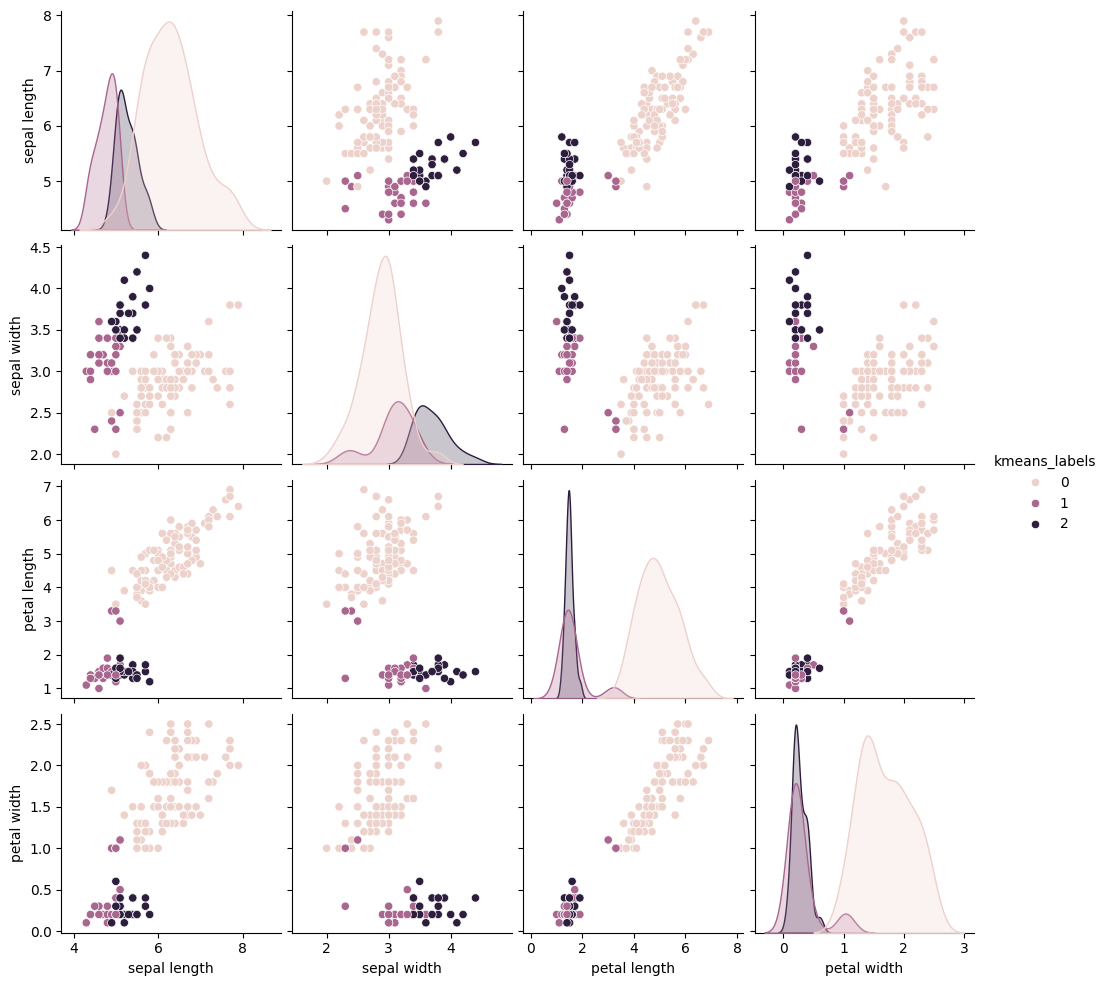

In [ ]:
data = load_iris()
df = pd.DataFrame()
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2]
df['petal width'] = data['data'][:,3]
X = df.to_numpy()
df['target'] = data['target']
named_targets = []

for elm in df['target'].to_list():
    named_targets.append(data.target_names[elm])
df['species_name'] = named_targets

X_train, X_test =train_test_split(
    X,
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True)
y = df['target'].to_numpy()
X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(
    X,y, range(X.shape[0]),
    test_size=0.30 ,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)

class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]
model = KMeans(k=3)
model.fit(X_train)
kmeans_labels = model.predict(X_test)
cluster_coords = model.centroids
print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)
df['kmeans_labels'] = model.predict(X)
sns.pairplot(df.drop(labels=['target'],axis=1), hue='kmeans_labels')


#3D Plot

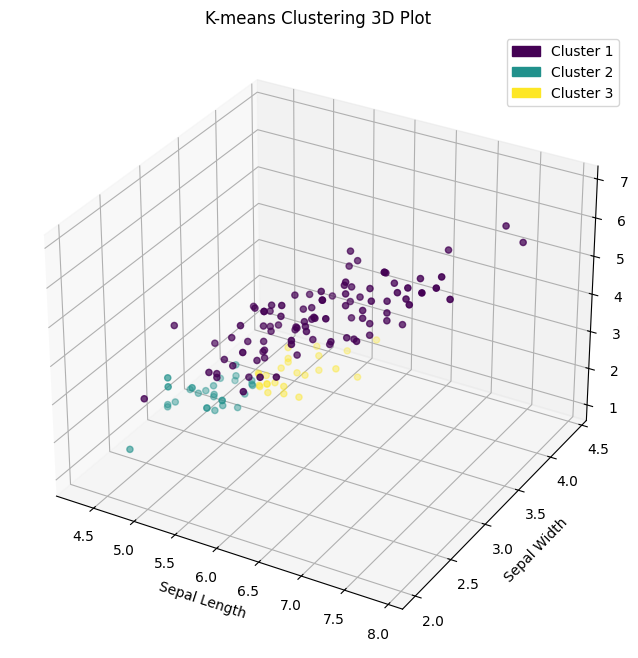

Fitting 10 folds for each of 27 candidates, totalling 270 fits
{'mean_fit_time': array([0.00246363, 0.00302517, 0.00149641, 0.00138421, 0.00189927,
       0.0012279 , 0.00115266, 0.00199959, 0.00263374, 0.00120273,
       0.00315731, 0.00545161, 0.00288424, 0.00580919, 0.00269797,
       0.00249515, 0.0019032 , 0.00138104, 0.00350993, 0.00197353,
       0.00268927, 0.00342119, 0.0033818 , 0.001969  , 0.00249331,
       0.00279062, 0.0027703 ]), 'std_fit_time': array([0.00198429, 0.00220986, 0.0005345 , 0.00048298, 0.00068459,
       0.00011075, 0.00010172, 0.00224219, 0.00368622, 0.00019783,
       0.00283643, 0.004755  , 0.002609  , 0.00389445, 0.00269096,
       0.00249032, 0.00095391, 0.00022218, 0.00306084, 0.00226886,
       0.00285411, 0.00326399, 0.00326683, 0.00217173, 0.00246593,
       0.00243537, 0.00288383]), 'mean_score_time': array([0.00662346, 0.00758746, 0.00760972, 0.00688925, 0.00862665,
       0.00468044, 0.00643978, 0.00593157, 0.00638261, 0.00756111,
       0.01312

In [ ]:
# For 3D Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')

all_kmeans_labels = model.predict(X)
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=all_kmeans_labels, cmap='viridis')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('K-means Clustering 3D Plot')

legend_labels = [mpatches.Patch(color=plt.cm.viridis(i/(model.k-1)),label=f'Cluster {i+1}')
                for i in range(model.k)]

ax.legend(handles=legend_labels)
plt.show()

param_grid = {
    "n_neighbors": range(1, 10),
    "p": range(1, 4),
}
grid_search = GridSearchCV(
    KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy', cv=10,verbose=1,n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(grid_search.cv_results_)
print(grid_search.best_score_)

#Sklearn Comparision

preds: [2 2 1 1 2 0 0 1 0 0 2 0 2 0 1 0 2 2 0 0 0 0 0 1 0 1 2 0 1 2 2 2 2 1 1 1 2
 2 2 0 2 1 1 2 1]
actual: [1 2 1 1 2 0 0 1 0 0 2 0 2 0 1 0 2 2 0 0 0 0 0 1 0 1 2 0 1 2 2 2 2 1 1 1 2
 1 2 0 2 1 1 2 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



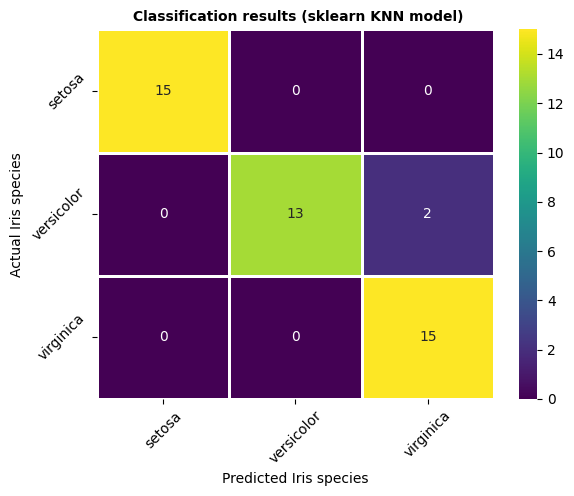

In [ ]:
#Sklearn Comparision
from sklearn.neighbors import KNeighborsClassifier
skmodel = KNeighborsClassifier(n_neighbors=3)
skmodel.fit(X_train,y_train)
print('preds:', skmodel.predict(X_test))
print('actual:', y_test)
cm_sk = confusion_matrix(y_test, skmodel.predict(X_test))
ax = sns.heatmap(cm_sk,linewidths=2, annot=True, cmap='viridis', cbar=True);

ax.set_xticklabels(data.target_names);
ax.set_yticklabels(data.target_names);
plt.xlabel('Predicted Iris species');
plt.ylabel('Actual Iris species');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results (sklearn KNN model)', fontsize='medium', fontweight='bold');
print(classification_report(y_test, skmodel.predict(X_test)))


[[ 0 15  0]
 [14  0  1]
 [ 3  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



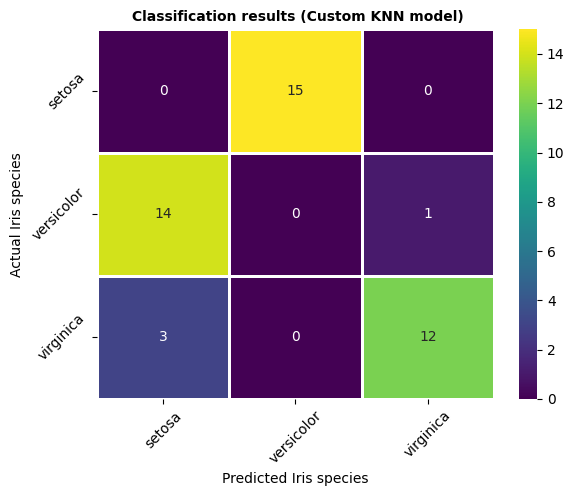

In [ ]:
cm = confusion_matrix(y_test,model.predict(X_test) )
print(cm)
ax = sns.heatmap(cm,linewidths=2, annot=True, cmap='viridis', cbar=True);
ax.set_xticklabels(data.target_names);
ax.set_yticklabels(data.target_names);
plt.xlabel('Predicted Iris species');
plt.ylabel('Actual Iris species');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results (Custom KNN model)', fontsize='medium', fontweight='bold');
print(classification_report(y_test, skmodel.predict(X_test)))